In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
mpl.rcParams["mathtext.fontset"] = "stix"
from scipy.stats import combine_pvalues

from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.special import logit
from scipy.special import expit

from sklearn.metrics import adjusted_rand_score

from scipy.stats import chisquare

from scipy.stats import hypergeom

In [95]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

# mRNA and quality of observations

This section explores each dataset's mRNA capture efficiency and splice junction read coverage.

This code generates figures 3a-g. It will require to process first the data, including the estimation of $\Psi$ observations and running the modified version of the Census normalization to estimate the number of captured mRNA molecules per cell.

In [4]:
%run -i 'load_data.py'

### Figure 3a: captured mRNA estimation

Here we show the distribution of estimated mRNA molecules captured per cell in each dataset. The estimated number of captured mRNAs was determined using a variation of the Census normalization (Qiu et al., 2017).

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


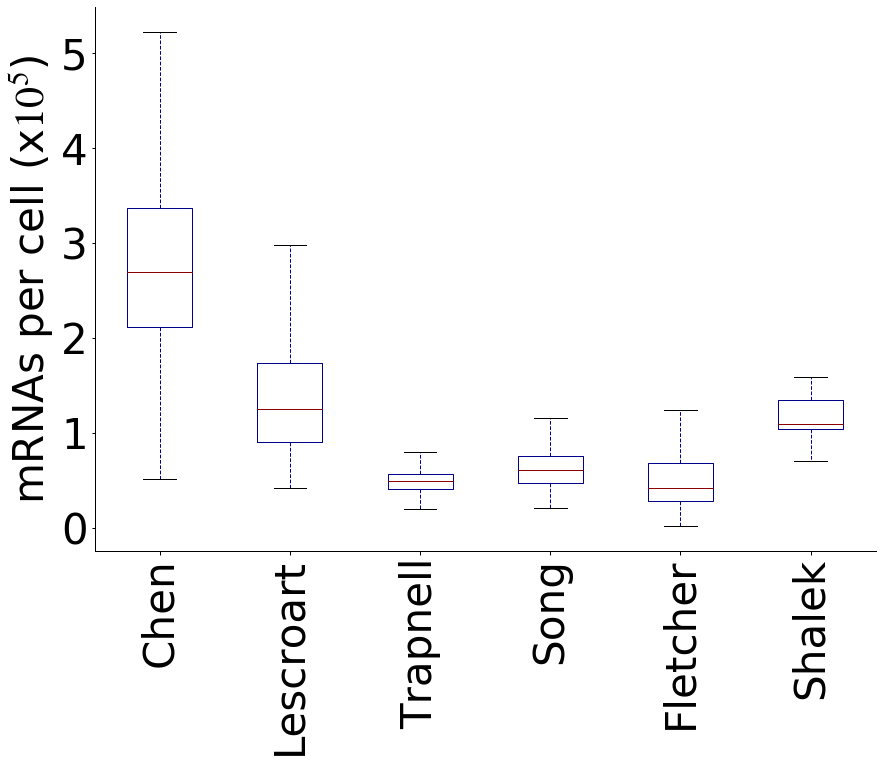

In [5]:
cuentas_chen = chen_mrna_counts.sum(axis=0)
cuentas_song = song_mrna_counts.sum(axis=0)
cuentas_trapnell = trapnell_mrna_counts.sum(axis=0)
cuentas_lescroart = lescroart_mrna_counts.sum(axis=0)
cuentas_das = das_mrna_counts.sum(axis=0)
cuentas_shalek = shalek_mrna_counts.sum(axis=0)

cuentas_df = [cuentas_chen, cuentas_lescroart, cuentas_trapnell, cuentas_song, cuentas_das, cuentas_shalek]
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


scp.plot_boxplot(cuentas_df, 'mRNAs per cell (x$10^5$)', dset_names, 'mrna_cells_boxplot', xlocs = np.array([1, 2, 3, 4, 5, 6]),
                 ylocs=[0, 100000, 200000, 300000, 400000, 500000], 
                 ytags=['0', '1', '2', '3', '4', '5', '6'], save_dir='plots_review/figure3/')

plt.show()

### Figure 3b and Supplementary Figures 3c-f

For each exon, we compare the average number of mRNA molecules captured for its gene, versus the number of informative splice junction reads (included and excluded). We also observe the relationship of these variables with the percentage of cells that present binary values ($\Psi =0$ or $\Psi=1$) for each exon.

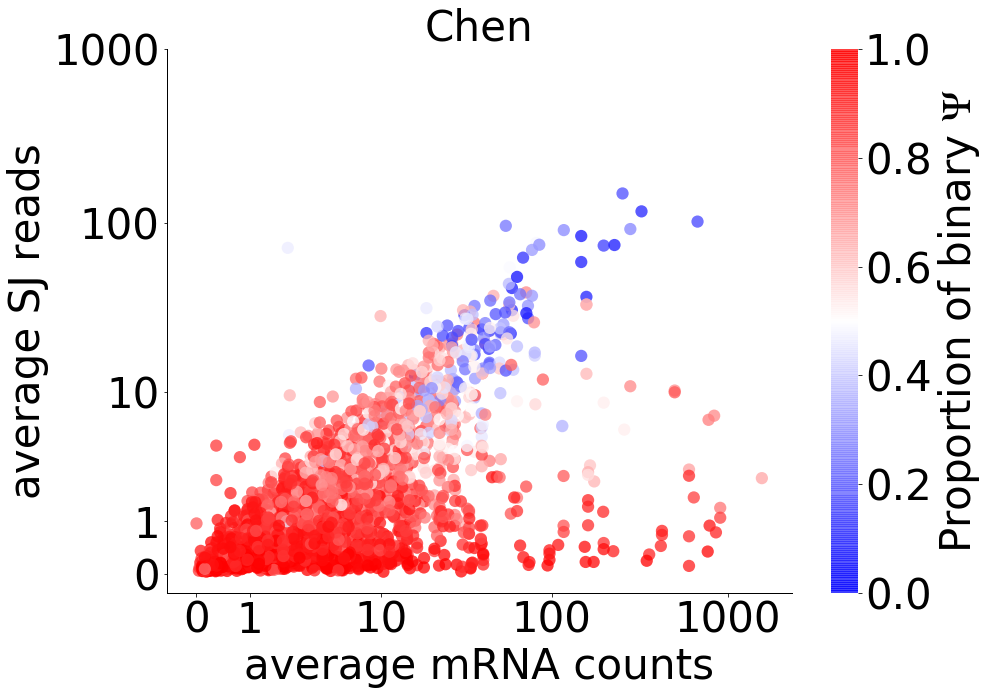

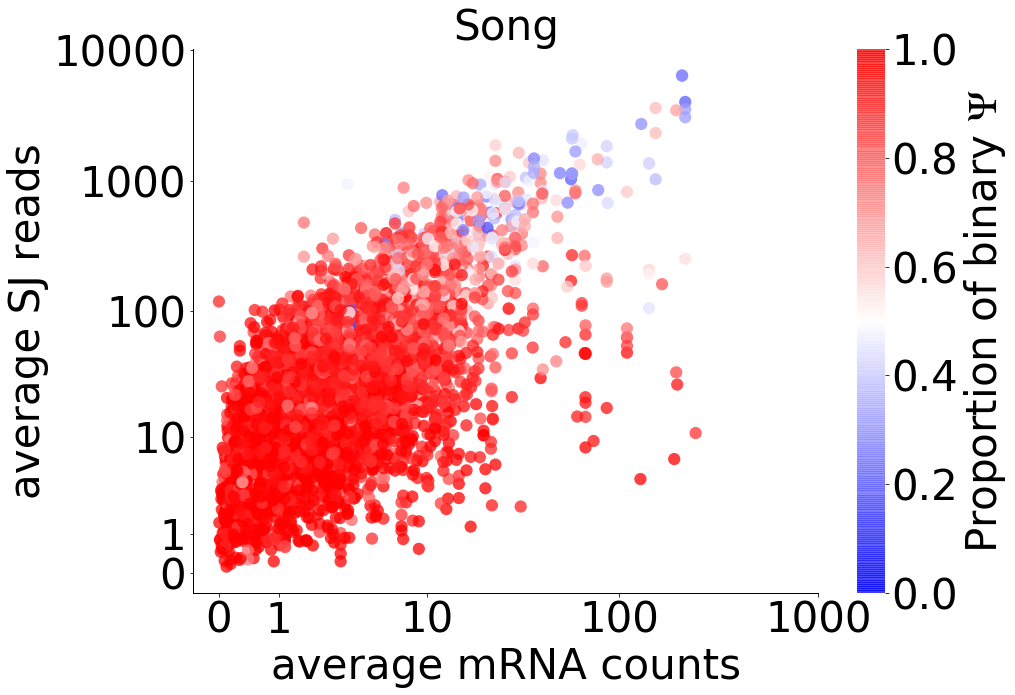

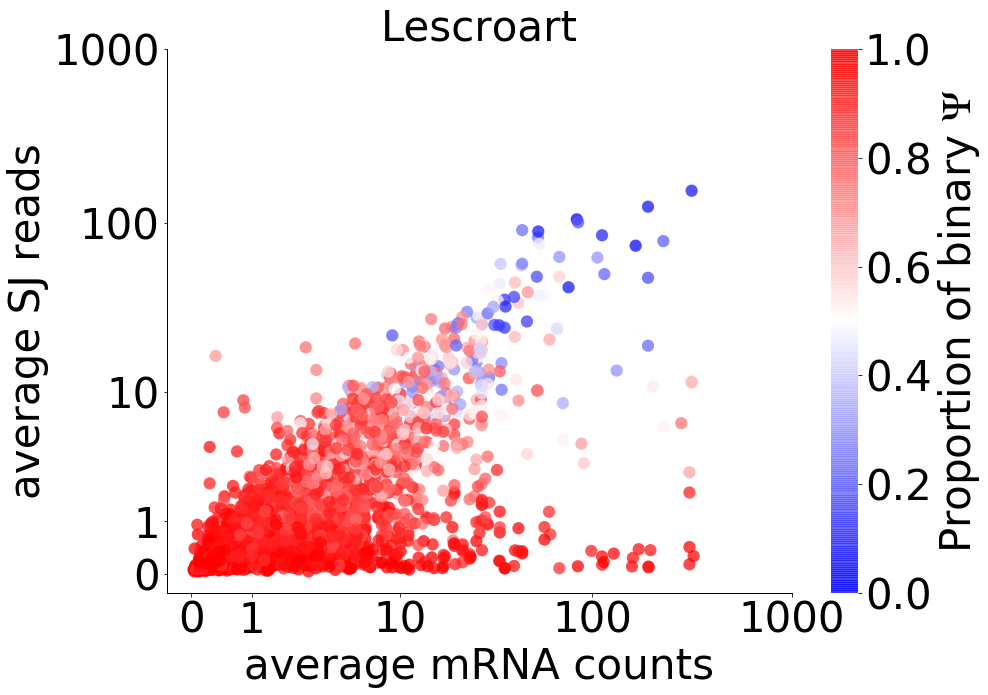

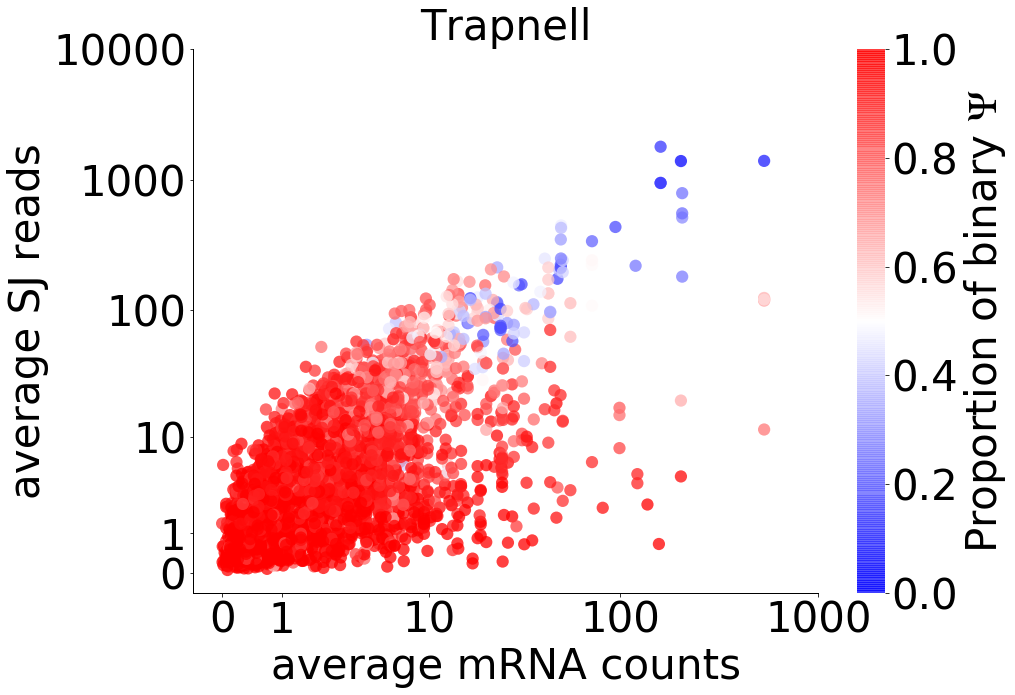

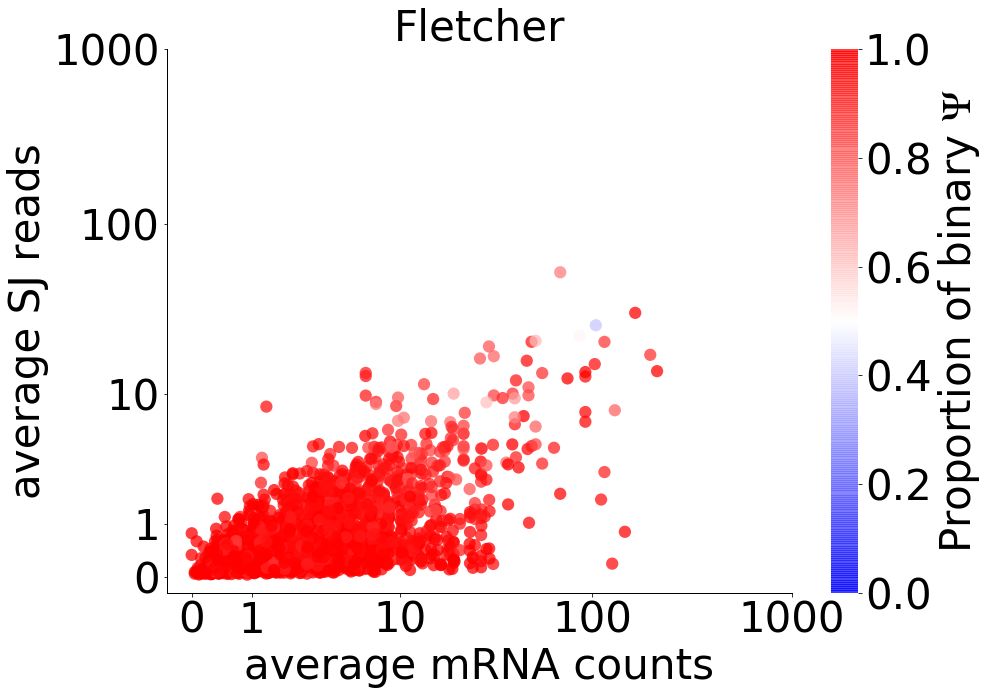

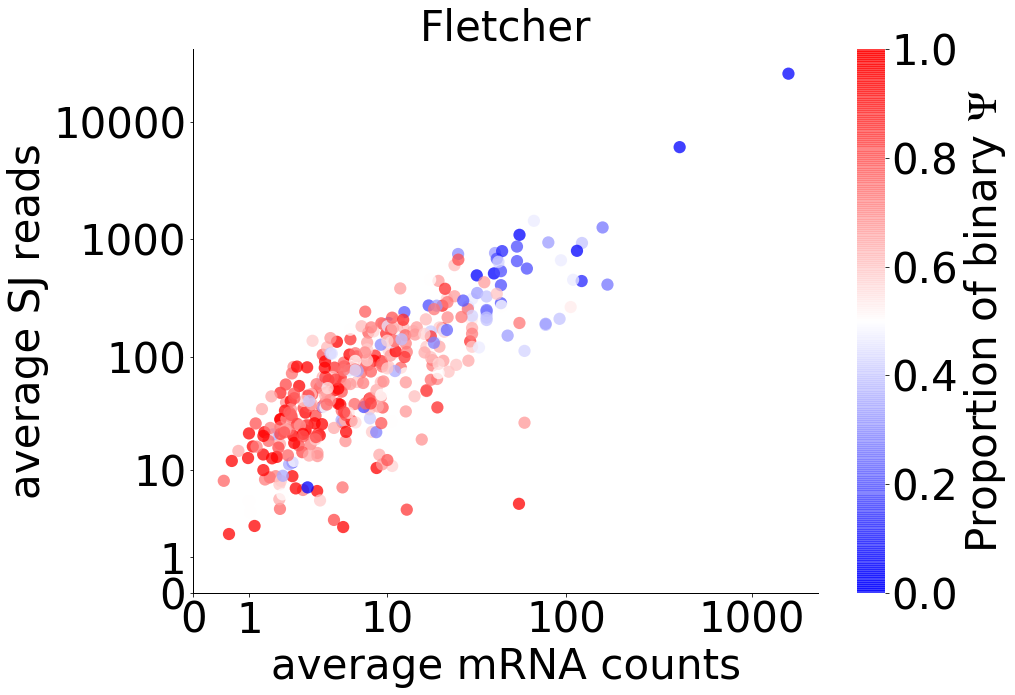

In [6]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]

das_int_genes, das_int_exons = spu.get_int_events(das_PSI, das_mrna_counts, 0.05)
das_int_exons = [x for x in das_int_exons if x in mrna_per_event_das.index]

shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]

reads_song, mrna_song, binary_song, psi_song = spu.get_dataset_averages(song_PSI, song_read_counts, 
                                                                        song_mrna_counts, song_int_exons)
reads_das, mrna_das, binary_das, psi_das = spu.get_dataset_averages(das_PSI, das_read_counts, 
                                                                     das_mrna_counts, das_int_exons)
reads_chen, mrna_chen, binary_chen, psi_chen = spu.get_dataset_averages(chen_PSI, chen_read_counts, 
                                                                        chen_mrna_counts, chen_int_exons)
reads_lescroart, mrna_lescroart, binary_lescroart, psi_lescroart = spu.get_dataset_averages(lescroart_PSI, 
                                                                                            lescroart_read_counts, 
                                                                                            lescroart_mrna_counts, 
                                                                                             lescroart_int_exons)
reads_trapnell, mrna_trapnell, binary_trapnell, psi_trapnell = spu.get_dataset_averages(trapnell_PSI, trapnell_read_counts, 
                                                                          trapnell_mrna_counts, trapnell_int_exons)
reads_shalek, mrna_shalek, binary_shalek, psi_shalek = spu.get_dataset_averages(shalek_PSI, shalek_read_counts, 
                                                                          shalek_mrna_counts, shalek_int_exons)

scp.plot_information_map2(mrna_chen, reads_chen, binary_chen, 'Chen', 
                         [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', 
                         mrna_min = 10, read_min = (10*chen_coverage_tab['SJ_coverage']).mean(), 
                          save_name = 'chen_binary_median',
                         plot_dir = 'plots_review/figure3/')


scp.plot_information_map2(mrna_song, reads_song, binary_song, 'Song',
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', max_x = 3, max_y = 4,
                         save_name = 'song_binary_median', mrna_min = 10, 
                         read_min=(10*song_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_lescroart, reads_lescroart, binary_lescroart, 'Lescroart', 
                          [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'lescroart_binary_median', mrna_min = 10, 
                         read_min=(10*lescroart_coverage_tab['SJ_coverage']).mean(), 
                          plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_trapnell, reads_trapnell, binary_trapnell,
                     'Trapnell',  [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', save_name = 'trapnell_binary_median', 
                          max_x = 3, max_y = 4, mrna_min = 10, read_min=(10*trapnell_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_das, reads_das, binary_das,
                     'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                         stat = 'median', save_name = 'fletcher_binary_median', mrna_min = 10, 
                          read_min=(10*das_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

scp.plot_information_map2(mrna_shalek, reads_shalek, binary_shalek,
                     'Fletcher', [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001)],
                         ['0', '1', '10', '100', '1000'],
                           [0, np.log10(2), np.log10(11), np.log10(101), np.log10(1001), np.log10(10001)],
                         ['0', '1', '10', '100', '1000', '10000'],
                         stat = 'median', save_name = 'shalek_binary_median', mrna_min = 10, 
                          read_min=(10*shalek_coverage_tab['SJ_coverage']).mean(),
                         plot_dir = 'plots_review/figure3/')

plt.show()

### Figure 3c: RNA-seq reads per splice junction

Estimation of the read coverage of each splice junction. This ratio was estimated as follows:

$$ SJ_j = \frac{\text{total splice junction reads in cell }j}{\text{total splice junctions in mRNAs of cell }j} = \frac{\sum_k r_{jk}}{\sum_k s_k m_{jk}}$$

Where $r_{jk}$ is the number of reads spanning constitutive splice junctions of gene $k$ in cell $j$, $s_k$ is the number of constitutive splice junctions of gene $k$, and $m_{jk}$ is the number of mRNA molecules of gene $k$ in cell $j$.

The number of reads spanning constitutive junctions were obtained from the **SJ.out.tab** output from the STAR alignment of each single cell. Constutive junctions were determined as junctions that appear in all annotated transcripts of each protein coding gene in the Gencode annotation (versions hg38 for human, mm10 for mouse).

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


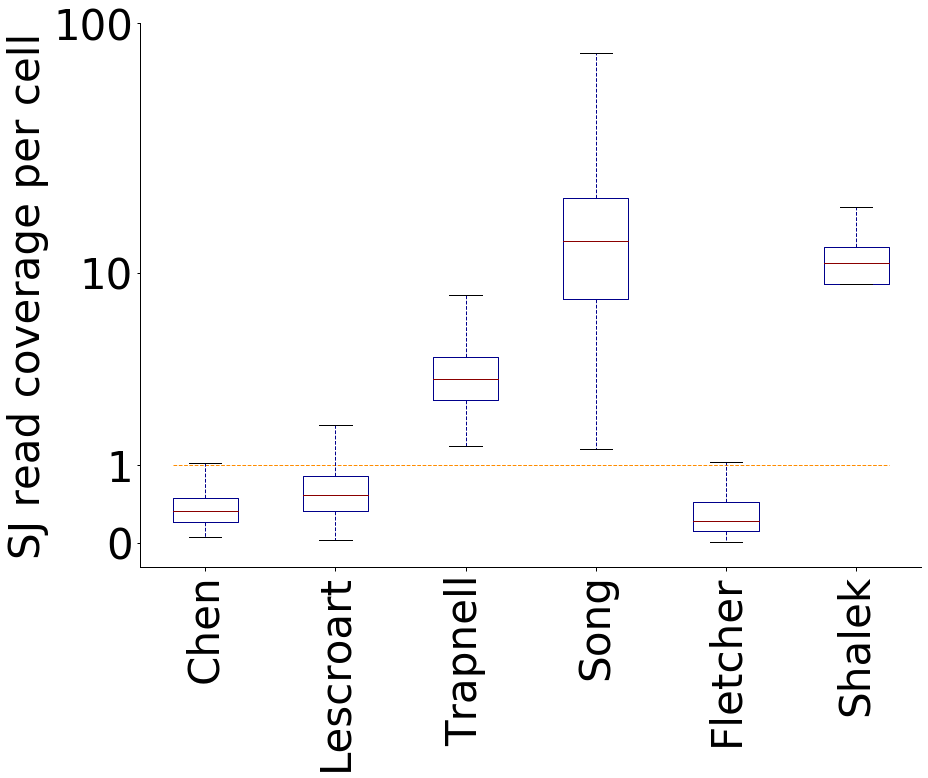

In [8]:
dset_names = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']

scp.plot_boxplot([np.log10(chen_coverage_tab['SJ_coverage']+1),np.log10(lescroart_coverage_tab['SJ_coverage']+1), 
                  np.log10(trapnell_coverage_tab['SJ_coverage']+1), np.log10(song_coverage_tab['SJ_coverage']+1), 
                  np.log10(das_coverage_tab['SJ_coverage']+1), np.log10(shalek_coverage_tab['SJ_coverage']+1)], 
                 'SJ read coverage per cell', dset_names, 
                 'reads_per_SJ_per_cell', ylocs = [0, np.log10(2), np.log10(11), np.log10(101)],
                 xlocs = np.array([1, 2, 3, 4, 5, 6]),
                 ytags = ['0', '1', '10', '100'], plot_line = np.log10(2), save_dir='plots_review/figure3/')

plt.show()

### Figure 3d and supplementary figure 3f

PCA projection of the Chen et al., 2016 motor neuron differentiation. PCA projection was based on gene expression normalized with SCONE (Cole et al., 2019). Cell clusters were defined through agglomerative clustering.

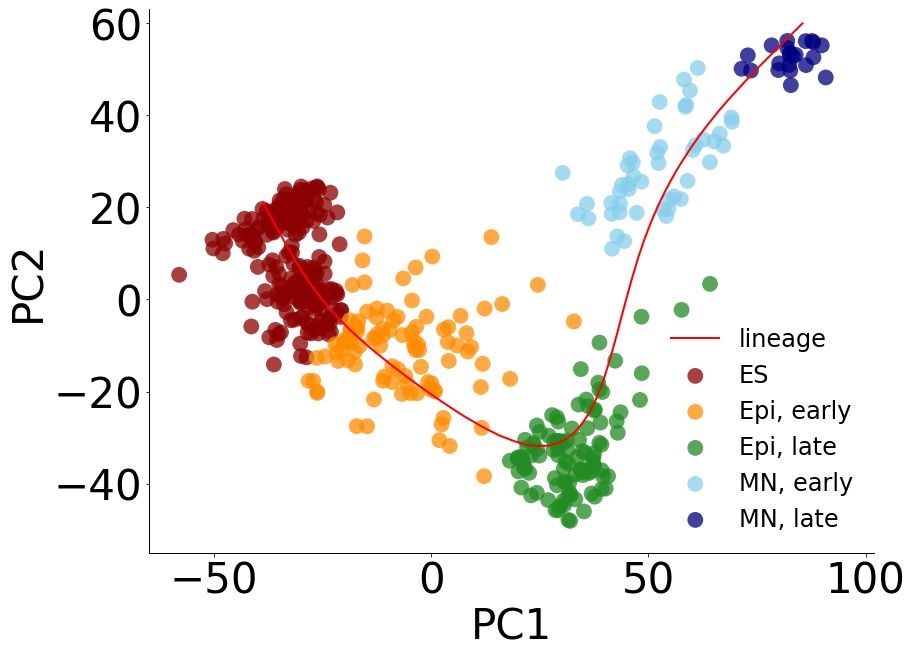

In [31]:
figsize(13,10)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==0], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==0], 
           c='darkred', s=250, edgecolors='none', label='ES', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==1], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==1], 
           c='darkorange', s=250, edgecolors='none', label='Epi, early', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==2], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==2], 
           c='forestgreen', s=250, edgecolors='none', label='Epi, late', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==3], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==3], 
           c='skyblue', s=250, edgecolors='none', label='MN, early', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.AC==4], 
           chen_pca_clust.PC2.loc[chen_pca_clust.AC==4], 
           c='navy', s=250, edgecolors='none', label='MN, late', alpha=0.75)

ax.plot(chen_pca_clust.line_1, chen_pca_clust.line_2, c='red',linewidth=2, label='lineage')


ax.set_xlim([-65, 102])
ax.set_ylim([-55, 63])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.tick_params(labelsize=42)

plt.ylabel('PC2', fontsize=42)
plt.xlabel('PC1', fontsize=42)
# plt.title(event.split('_')[0], fontsize=48)

plt.legend(frameon=False, fontsize = 24, loc='lower right')

plt.show()

Same PCA projection, coloring of cells made by annotated cell type provided by the authors of the study.

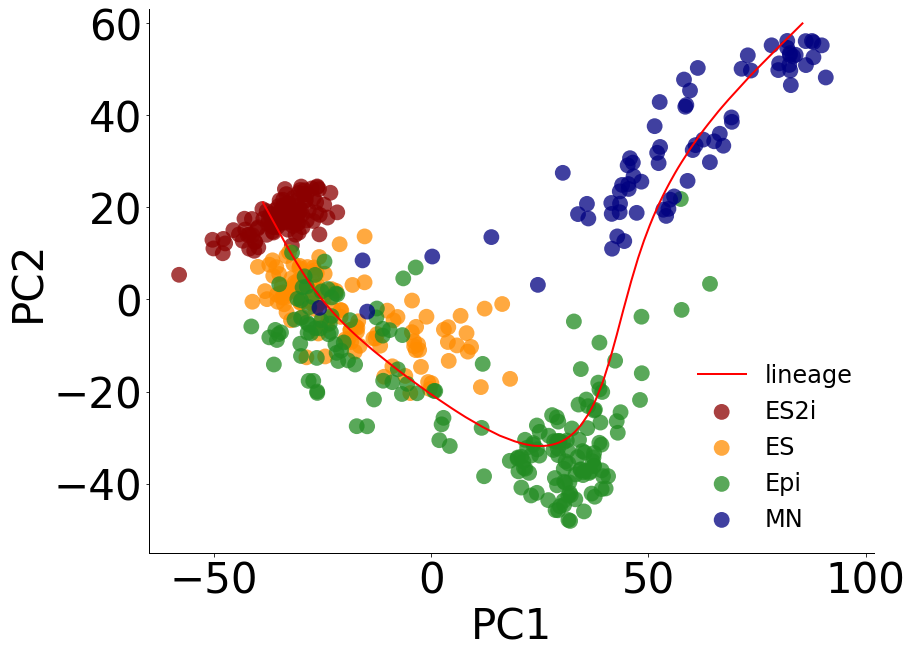

In [32]:
figsize(13,10)
fig = plt.figure()
ax  = plt.subplot(1,1,1)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='ES2i'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='ES2i'], 
           c='darkred', s=250, edgecolors='none', label='ES2i', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='ES'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='ES'], 
           c='darkorange', s=250, edgecolors='none', label='ES', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='Epi'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='Epi'], 
           c='forestgreen', s=250, edgecolors='none', label='Epi', alpha=0.75)

ax.scatter(chen_pca_clust.PC1.loc[chen_pca_clust.cell_type=='Motor neuron'], 
           chen_pca_clust.PC2.loc[chen_pca_clust.cell_type=='Motor neuron'], 
           c='navy', s=250, edgecolors='none', label='MN', alpha=0.75)

ax.plot(chen_pca_clust.line_1, chen_pca_clust.line_2, c='red',linewidth=2, label='lineage')


ax.set_xlim([-65, 102])
ax.set_ylim([-55, 63])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.tick_params(labelsize=42)

plt.ylabel('PC2', fontsize=42)
plt.xlabel('PC1', fontsize=42)
# plt.title(event.split('_')[0], fontsize=48)

plt.legend(frameon=False, fontsize = 24, loc='lower right')

plt.show()

### Figure 3e

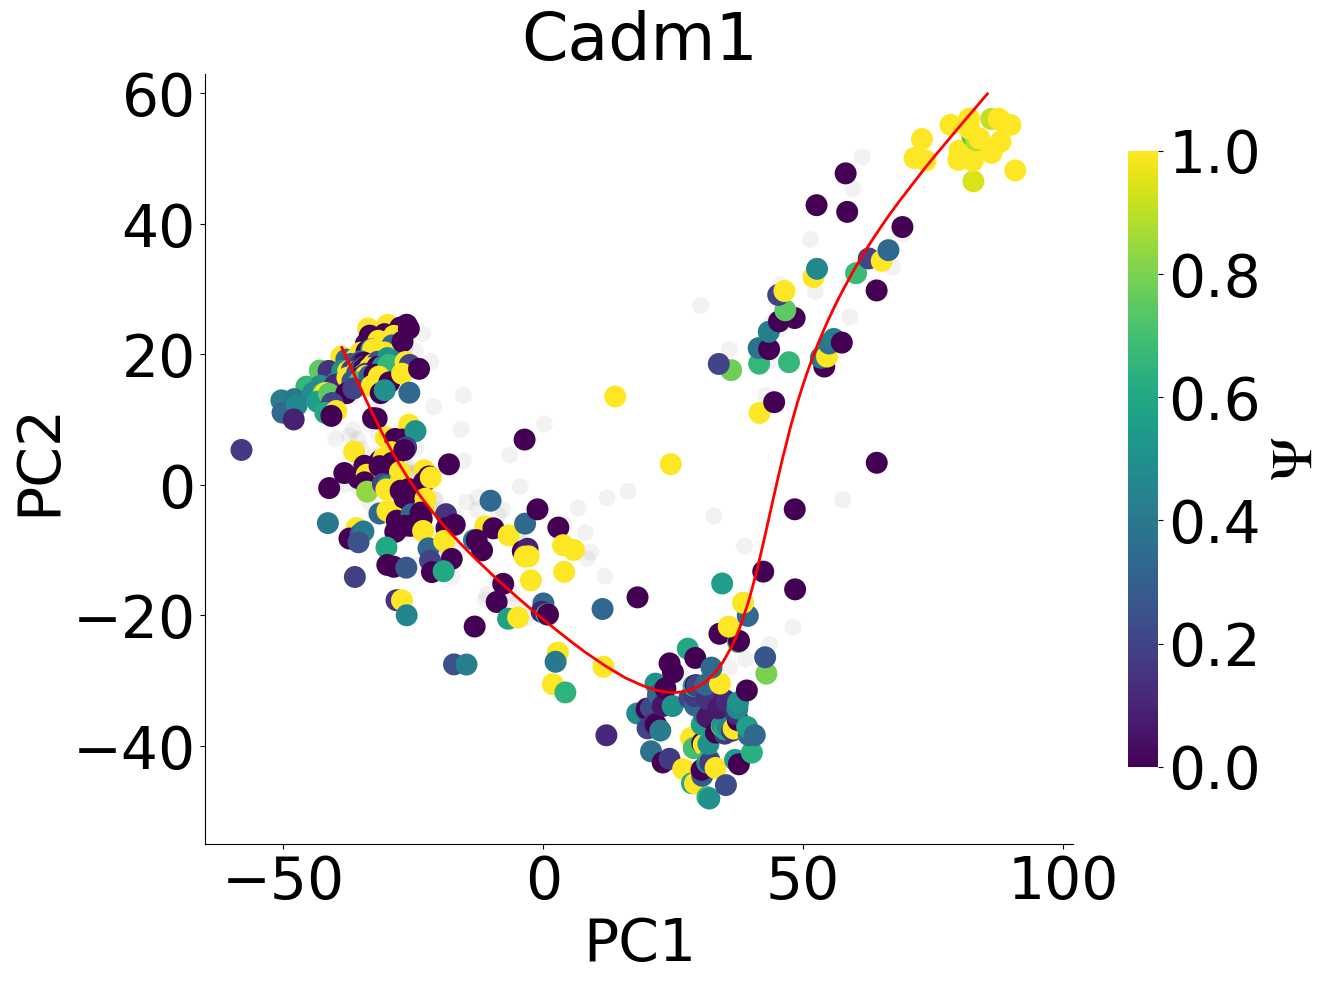

In [39]:
figsize(14,10)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Cadm1_2', 10, filter_cells=False, plot_dir = 'plots_review/figure3/events/')

### Figure 3f

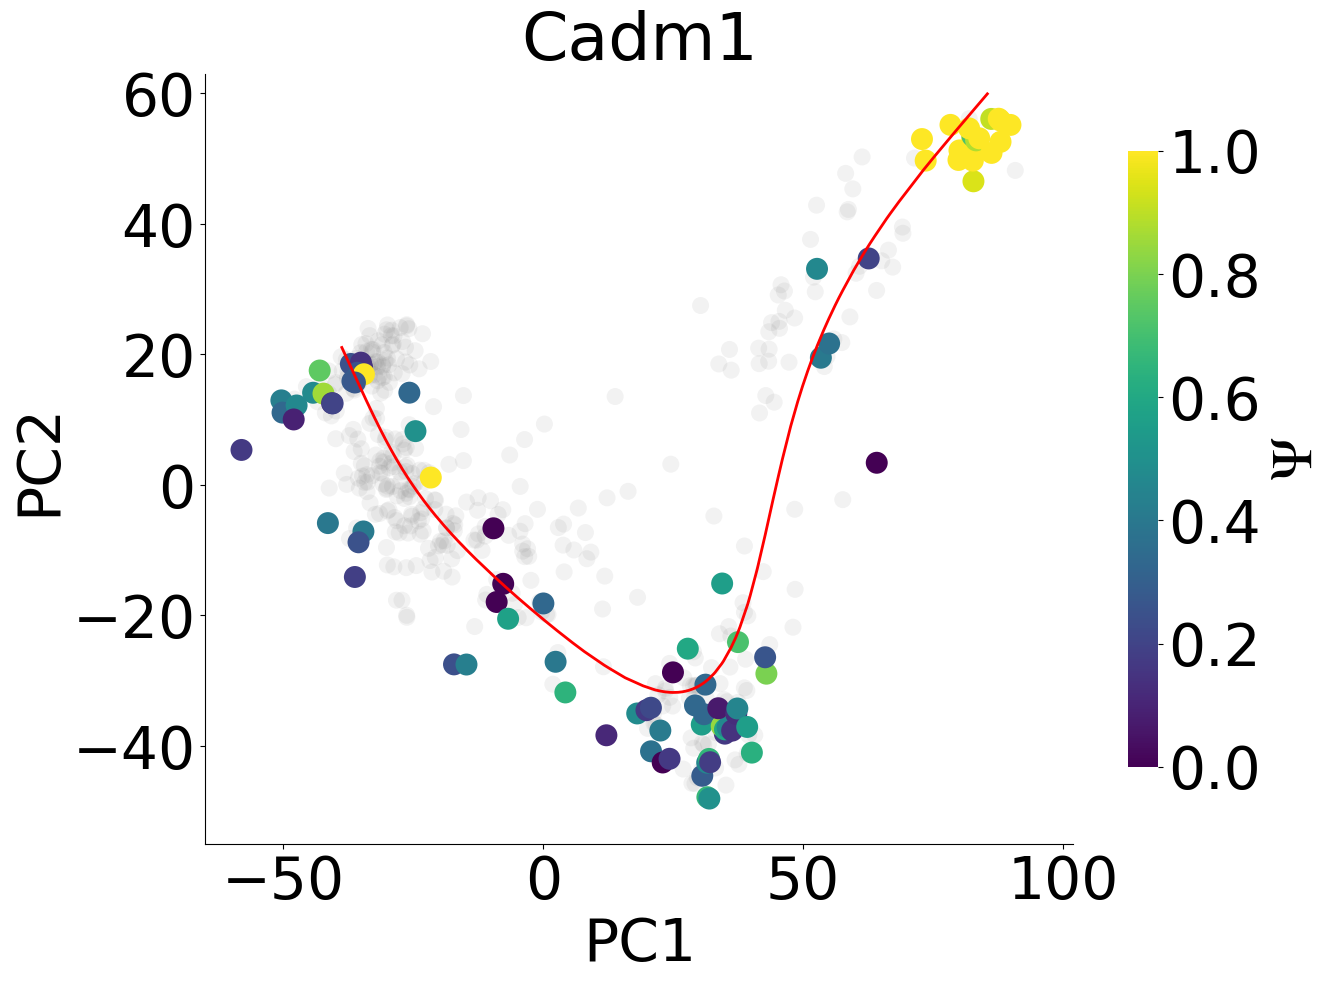

In [40]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Cadm1_2', 10, filter_cells=True, plot_dir = 'plots_review/figure3/events/')

### Figure 3g: Stacked histograms

Distribution of $\Psi$ densities in selected exons for each cell cluster. For each exon $k$, we only consider an observation in a given cell $j$ if:
* There are at least 10 mRNA molecules of the gene that contains the exon in the cell.
* There are at least $10 \cdot SJ_j (1-\Psi_kj)$ informative junction reads of the exon in the cell.

Where $SJ_j$ is the splice junction read coverage in cell $j$, and $\Psi_kj$ is the observed $\Psi$ for exon $k$ in cell $j$. 


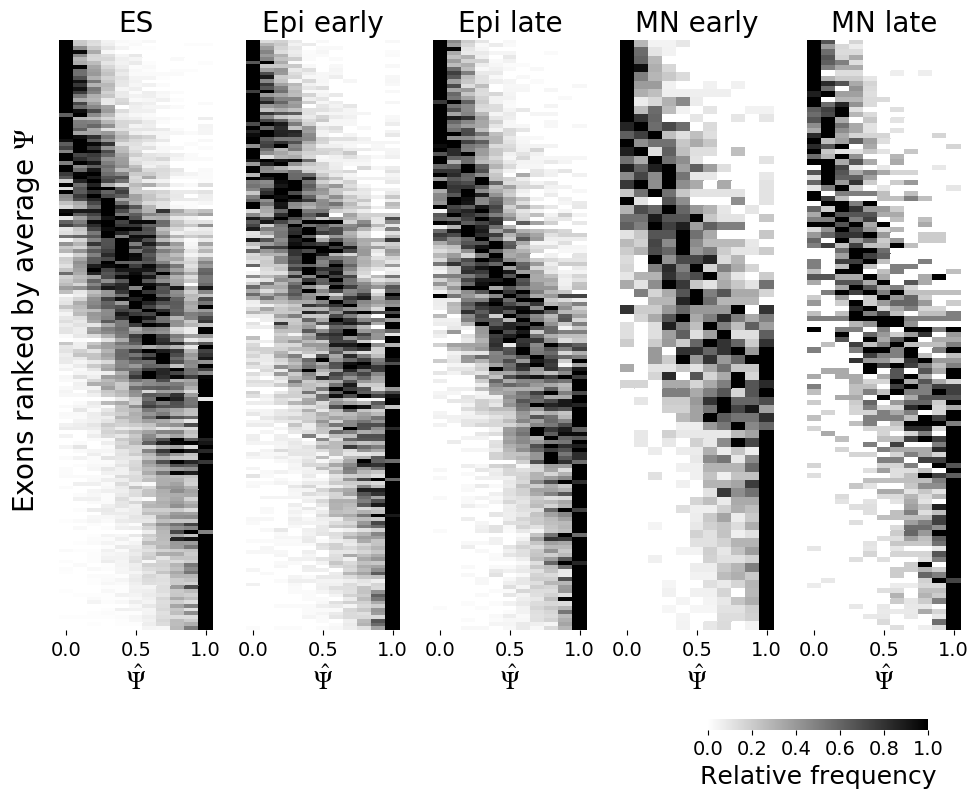

In [49]:
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['ES', 'Epi early', 'Epi late', 'MN early', 'MN late']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [106]:
chen_filtered = filter_psi(chen_PSI, chen_int_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'], 
                           chen_read_counts, 10, 0, cell_min=0.5)

lescroart_filtered = filter_psi(lescroart_PSI, lescroart_int_exons, mrna_per_event_lescroart, lescroart_coverage_tab['SJ_coverage'], 
                           lescroart_read_counts, 10, 0, cell_min=0.5)

trapnell_filtered = filter_psi(trapnell_PSI, trapnell_int_exons, mrna_per_event_trapnell, trapnell_coverage_tab['SJ_coverage'], 
                           trapnell_read_counts, 10, 0, cell_min=0.5)

song_filtered = filter_psi(song_PSI, song_int_exons, mrna_per_event_song, song_coverage_tab['SJ_coverage'], 
                           song_read_counts, 10, 0, cell_min=0.5)

das_filtered = filter_psi(das_PSI, das_int_exons, mrna_per_event_das, das_coverage_tab['SJ_coverage'], 
                           das_read_counts, 10, 0, cell_min=0.5)

shalek_filtered = filter_psi(shalek_PSI, shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                           shalek_read_counts, 10, 0, cell_min=0.5)

filtered_exons_count = []
filtered_exons_count.append(chen_filtered[0].shape[0])
filtered_exons_count.append(lescroart_filtered[0].shape[0])
filtered_exons_count.append(trapnell_filtered[0].shape[0])
filtered_exons_count.append(song_filtered[0].shape[0])
filtered_exons_count.append(das_filtered[0].shape[0])
filtered_exons_count.append(shalek_filtered[0].shape[0])

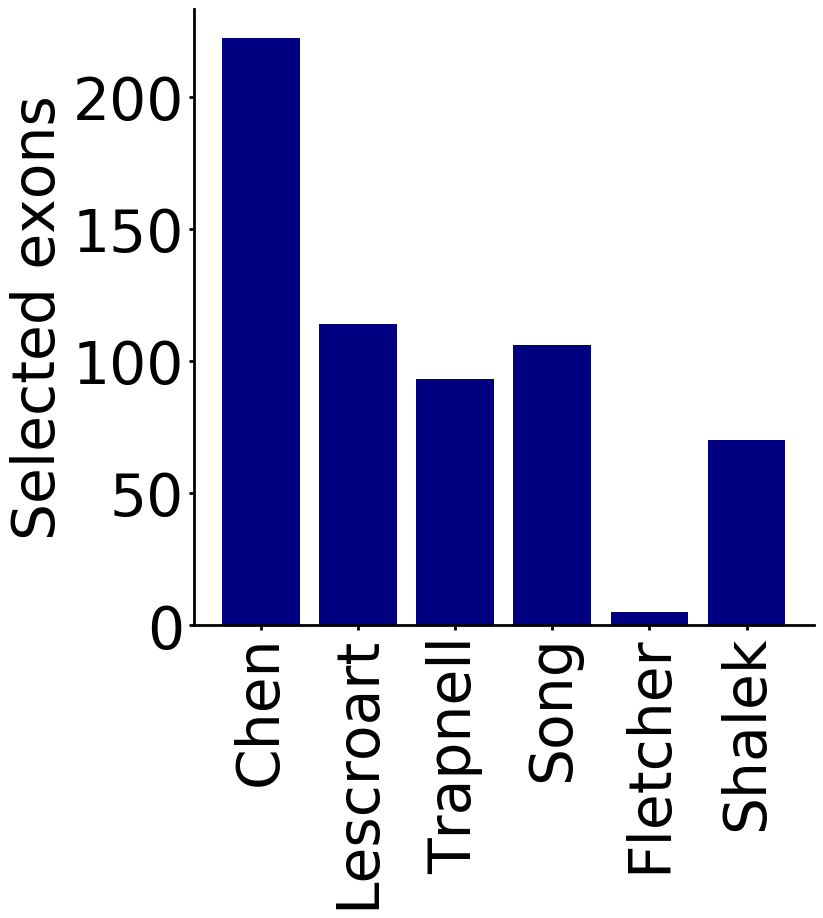

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar([1, 2, 3, 4, 5, 6], filtered_exons_count, color='navy')
ax.tick_params(labelsize=42)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)


plt.ylabel("Selected exons", fontsize=42)

locs, labels = plt.yticks()


plt.xticks([1, 2, 3, 4, 5, 6], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek'], fontsize=42, rotation='vertical')    

plt.savefig('plots_review/figure3/selected_exons_per_dataset.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure3/selected_exons_per_dataset.png', dpi=300, bbox_inches='tight')

plt.show()

### Bimodality curves

### ANOVA tests

### Figure 3j: Filtered observations for some selected exons

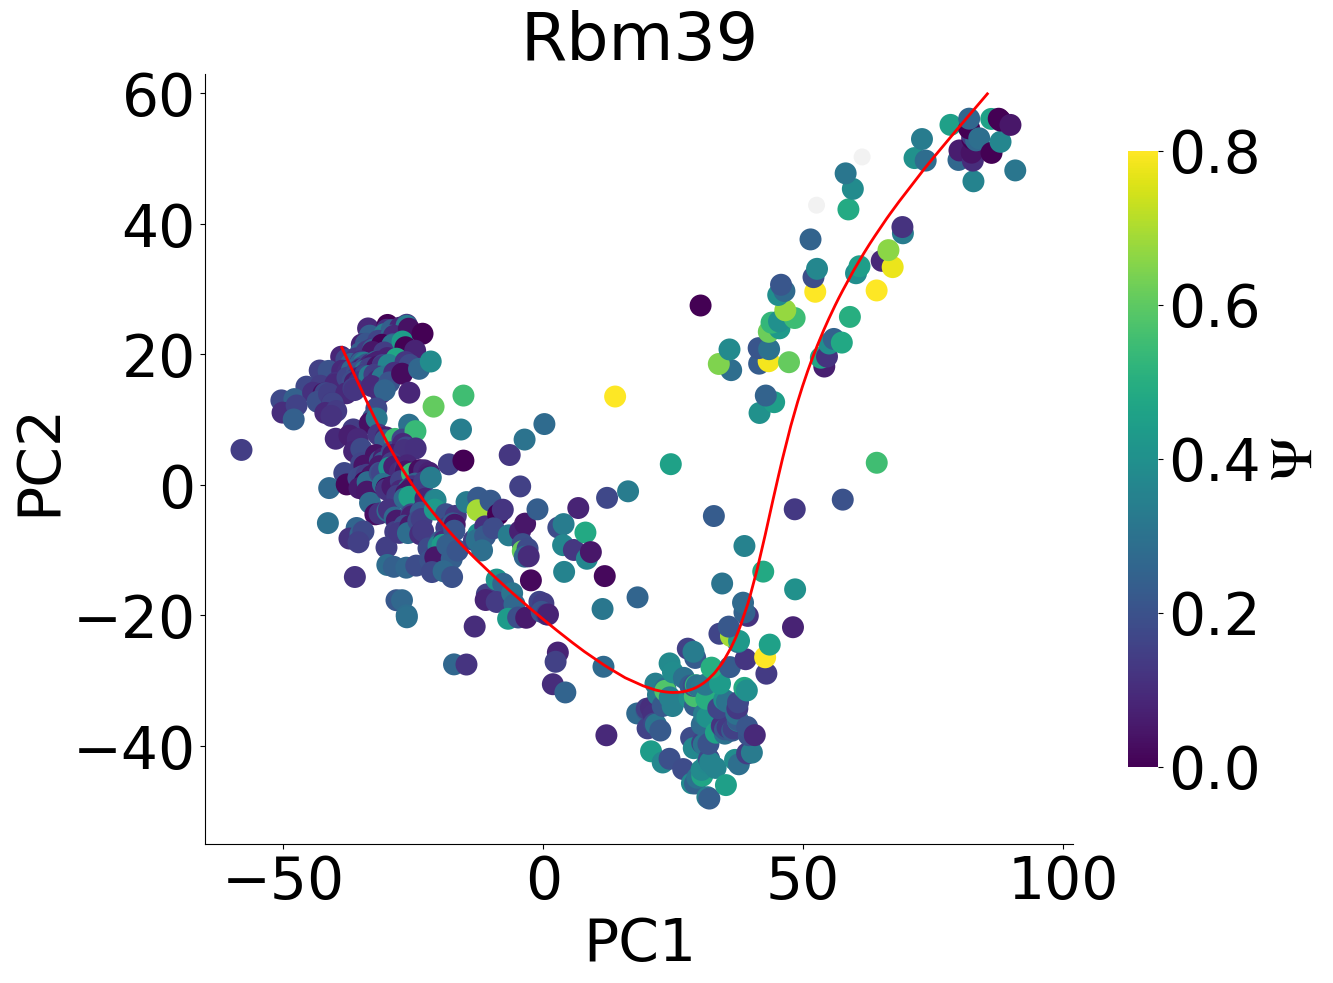

In [97]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Rpn2_1', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Clta_4', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Mff_3', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Tecr_4', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Zfp207_1', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Nsfl1c_2', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Rbm39_nmdSE_2', 10, plot_dir = 'plots_review/figure3/events/', vmax=0.8)
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Idh3g_1', 10, plot_dir = 'plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
         'Hnrnpdl_nmdSE_1', 10, plot_dir = 'plots_review/figure3/events/', vmax=0.5)
